## Imports

In [1]:
!pip3 install symbeam
%matplotlib inline
from symbeam import beam

---

# Input

**Set beam type and length**

In [2]:
beam_type = int(input("Choose beam type: \n1.Cantilever \n2.Simply Supported \nChoice:"))
beam_length = int(input("Enter beam length: "))

Choose beam type: 
1.Cantilever 
2.Simply Supported 
Choice:1
Enter beam length: 10


**Set Supports for Beam**



In [3]:
# Set supports for Cantilever
if beam_type == 1:
  left_support = 'fixed'

# Set supports for SimplySupported
elif beam_type == 2:
  left_support = 'pin'
  right_support = 'roller'

else:
  print('Wrong choice!')

**Add Loads**

In [4]:
point_load_list = []
udl_load_list = []
moment_list = []

print("********************************************************************************************")
load_choice = int(input("\nAdd Loads: \n1.Point Load \n2.UDL \n3.Moment \n0.Finish \nChoice: "))

while load_choice != 0:
  if load_choice == 1:
    point_load_list.append({'mag':int(input("\tEnter magnitude of point load (in N, upward is +ve, downward is -ve): ")), 
                            'pos':int(input("\tEnter distance of point load (from left end): "))})
  elif load_choice == 2:
    udl_load_list.append({'mag':int(input("\tEnter magnitude of UDL (in Nm, upwards is +ve, downwards is -ve): ")), 
                          'start':int(input("\tEnter starting point of UDL (from left end): ")), 
                          'end':int(input("\tEnter ending point of UDL (from left end):"))})
  elif load_choice == 3:
    moment_list.append({'mag':int(input("\tEnter magnitude of moment (in Nm, clockwise is +ve, anitclockwise is -ve): ")), 
                        'pos':int(input("\tEnter distance of moment (from left end): "))})
  else:
    print("Wrong choice\n")

  print("\n********************************************************************************************")

  load_choice = int(input("Add Loads: \n1.Point Load \n2.UDL \n3.Moment \n0.Finish \nChoice: "))
  

********************************************************************************************

Add Loads: 
1.Point Load 
2.UDL 
3.Moment 
0.Finish 
Choice: 1
	Enter magnitude of point load (in N, upward is +ve, downward is -ve): -20
	Enter distance of point load (from left end): 4

********************************************************************************************
Add Loads: 
1.Point Load 
2.UDL 
3.Moment 
0.Finish 
Choice: 2
	Enter magnitude of UDL (in Nm, upwards is +ve, downwards is -ve): -10
	Enter starting point of UDL (from left end): 6
	Enter ending point of UDL (from left end):8

********************************************************************************************
Add Loads: 
1.Point Load 
2.UDL 
3.Moment 
0.Finish 
Choice: 3
	Enter magnitude of moment (in Nm, clockwise is +ve, anitclockwise is -ve): 30
	Enter distance of moment (from left end): 9

********************************************************************************************
Add Loads: 
1.Point Loa

---

## Initialize Beam







In [5]:
new = beam(length = beam_length)


## Add supports
Options are `pin`, `roller` and `fixed`

In [6]:
# Add left support
new.add_support(x_coord = 0, support_type = left_support)

# Add right support, skip if cantalever
if beam_type != 1:
  new.add_support(x_coord = beam_length, support_type = right_support)


## Add loads
Apply external loads to the beam. These can be point forces, point moments or distributed forces.

In [7]:
# Add Point Load
for point_load in point_load_list:
  new.add_point_load(x_coord = point_load['pos'], value = point_load['mag'])

# Add Uniformly Distributed Load
for udl_load in udl_load_list:
  new.add_distributed_load(x_start = udl_load['start'], x_end = udl_load['end'], expression = udl_load['mag'])

# Add Moments
for moments in moment_list:
  new.add_point_moment(x_coord = moments['pos'], value = moments['mag'])

## Solve the problem and plot the results

In [8]:
new.solve()


                                    Beam points                                    
     Coordinate              Type                 Load                Moment       
-----------------------------------------------------------------------------------
         0                  Fixed                  0                    0          
         4             Continuity point           -20                   0          
         6             Continuity point            0                    0          
         8             Continuity point            0                    0          
         9             Continuity point            0                    30         
         10            Continuity point            0                    0          


                                   Beam segments                                   
        Span            Young modulus           Inertia          Distributed load  
-------------------------------------------------------------------------

(<Figure size 504x576 with 4 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:ylabel='Shear force, $V(x)$'>,
        <AxesSubplot:ylabel='Bending moment, $M(x)$'>,
        <AxesSubplot:xlabel='Coordinate, $x$', ylabel='Deflection, $v(x)$'>],
       dtype=object))

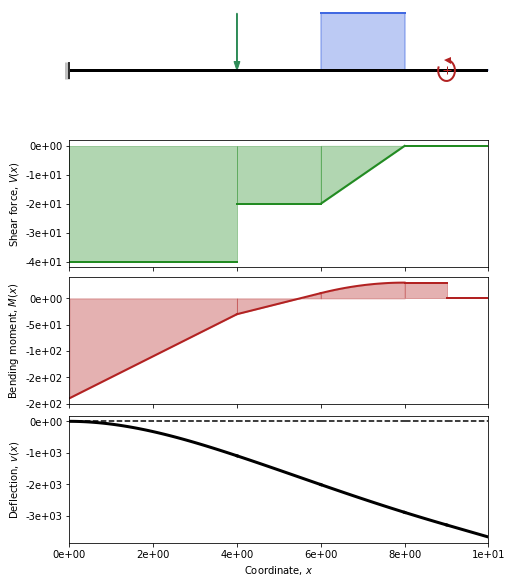

In [9]:
new.plot()